Average path lenght :  26.333333333333332
Average Clustering :  0.0


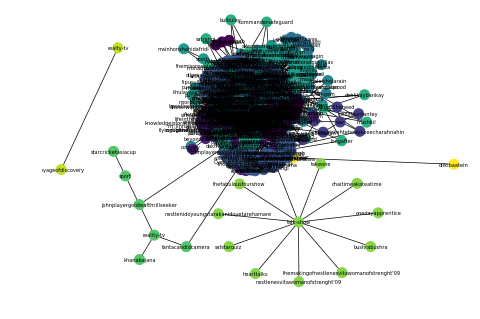

In [27]:
def community_layout(g, partition):

    pos_communities = _position_communities(g, partition, scale=160.)

    pos_nodes = _position_nodes(g, partition, scale=80.)

    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    pos_communities = nx.spring_layout(hypergraph, **kwargs)
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

from community import community_louvain
partition = community_louvain.best_partition(g)
pos = community_layout(g, partition)
cols = [float(i) for i in partition.values()]
nx.draw(g,pos, node_color=cols, with_labels=True,node_size=100,width=0.7,font_size=5); 
print("Average path lenght : ",nx.average_shortest_path_length(G))
print("Average Clustering : ",nx.average_clustering(G))
plt.show()